<center>
<p style="text-align:center; font-weight:700; font-size:50px; color:#940ee6;">Titanic Survival Prediction</p>
<br>
<img src="https://media.giphy.com/media/OJw4CDbtu0jde/giphy.gif" align="center" width=600>
<br>
</center>

# Import Libaries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_df = pd.read_csv("./titanic_train.csv")

In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Information about dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


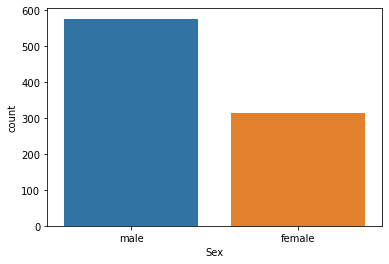

In [11]:
sns.countplot(x='Sex', data = titanic_df)
plt.show()

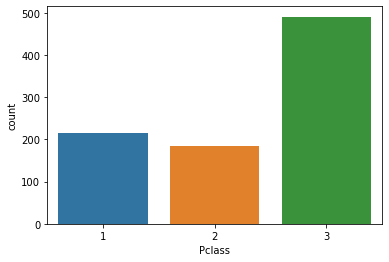

In [12]:
sns.countplot(x='Pclass', data = titanic_df)
plt.show()

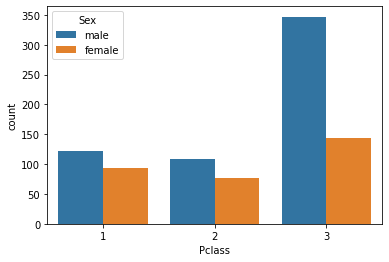

In [13]:
sns.countplot(x='Pclass', data = titanic_df, hue='Sex')
plt.show()

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


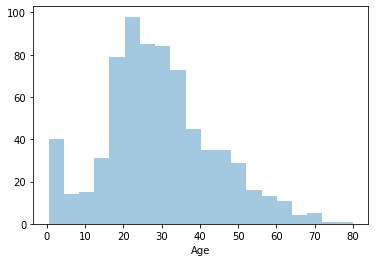

In [19]:
sns.distplot(titanic_df['Age'], kde=False, bins=20)
plt.show()

In [21]:
titanic_df['Along']= titanic_df['SibSp'] + titanic_df['Parch']

In [22]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [23]:
titanic_df['Along'].loc[titanic_df['Along']>0] = 1

In [24]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


# Factors to Survive

<AxesSubplot:xlabel='Pclass', ylabel='count'>

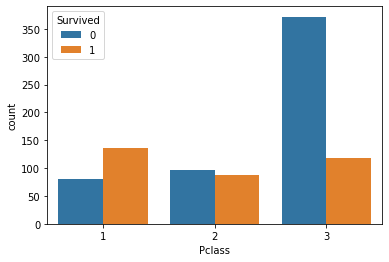

In [26]:
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

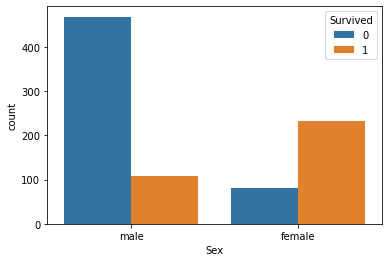

In [27]:
sns.countplot(x='Sex', data=titanic_df, hue='Survived')

# Data Preparation

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
titanic_df = titanic_df.drop(columns= [ 'PassengerId', 'Name', 'Ticket', 'Cabin','Embarked' ])

In [32]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [35]:
titanic_df['Sex'] = np.where(titanic_df['Sex'] =='male',1, 0)

In [36]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


<AxesSubplot:>

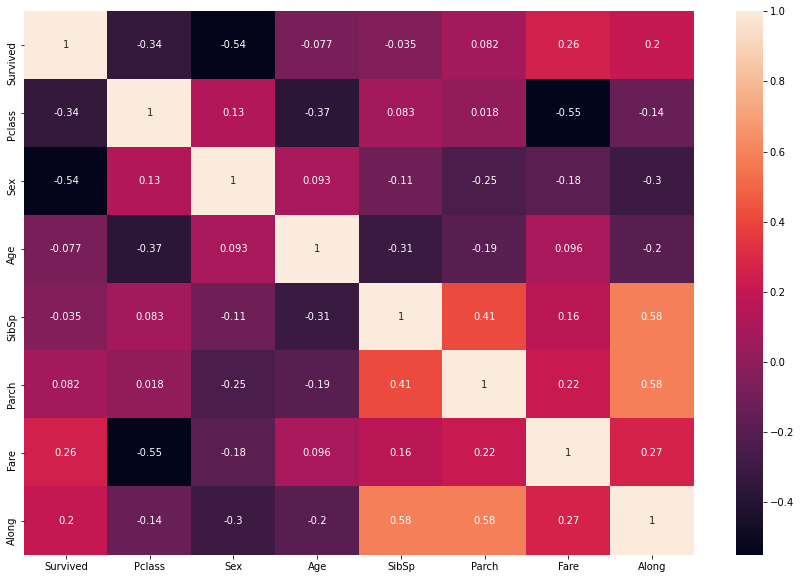

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df.corr(), annot=True)

# Handling Missing Values

In [41]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Along         0
dtype: int64

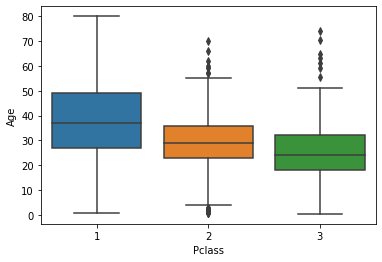

In [43]:
sns.boxplot(x='Pclass', y='Age', data = titanic_df)
plt.show()

In [44]:
titanic_df['Age'].mean()

29.69911764705882

In [50]:
print(titanic_df[titanic_df['Pclass']==1]['Age'].mean())
print(titanic_df[titanic_df['Pclass']==2]['Age'].mean())
print(titanic_df[titanic_df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [62]:
def fill_age(row):
    age = row[0]
    pclass = row[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38.23
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
        
    else:
        return age    

In [64]:
titanic_df['Age'] =  titanic_df[['Age', 'Pclass']].apply(fill_age, axis=1)

In [65]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

In [67]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


# Model Building

In [70]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [78]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [117]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [118]:
y_pred = model.predict(X_test)

In [119]:
model.score(X_train, y_train)

0.8342696629213483

In [120]:
model.score(X_test, y_test)

0.8212290502793296

In [121]:
from sklearn.metrics import classification_report, f1_score

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [123]:
f1_score(y_test, y_pred)

0.7611940298507462

# Visualizing the Tree

In [124]:
from sklearn import tree

In [125]:
features = X.columns

In [126]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Along'], dtype='object')

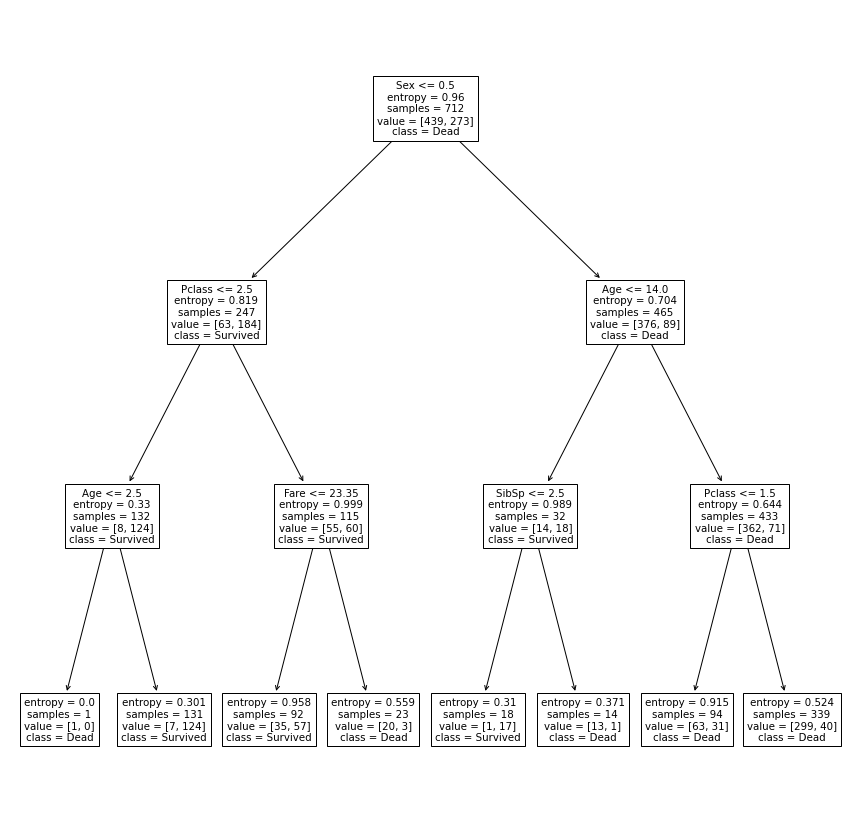

In [128]:
plt.figure(figsize=(15,15))
result = tree.plot_tree(model, feature_names=features , class_names=['Dead', 'Survived'])